In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def fetch_draft_data(year):
    # Fetch the webpage
    url = f'https://www.eliteprospects.com/draft/nhl-entry-draft/{year}'
    response = requests.get(url)
    html_content = response.text

    # Parse the HTML content
    soup = BeautifulSoup(html_content, 'html.parser')

    # Find the div with the ID 'drafted-players'
    div = soup.find('div', id='drafted-players')

    # If div is found, proceed to extract player data
    data = []
    if div:
        rows = div.find_all('tr')
        for row in rows:
            columns = row.find_all('td')
            # Extract text from each column
            row_data = [col.get_text(strip=True) for col in columns]
            # Prepend the year to each row's data
            row_data.insert(0, year)
            data.append(row_data)  # Append each row's data to the list
    else:
        print(f"Div with ID 'drafted-players' not found for year {year}.")
    
    return data


In [3]:
# Define the years of interest
years = range(2007, 2023)

# Define custom headers
custom_headers = [
    "Year", "Pick", "", "Team", "Player", "Seasons", "GP", "Goals", "Assists", "Points", "PM"
]

# Initialize a list to hold all data
all_data = []

for year in years:
    print(f"Fetching data for year {year}...")
    year_data = fetch_draft_data(year)
    if year_data:
        all_data.extend(year_data)

Fetching data for year 2007...
Fetching data for year 2008...
Fetching data for year 2009...
Fetching data for year 2010...
Fetching data for year 2011...
Fetching data for year 2012...
Fetching data for year 2013...
Fetching data for year 2014...
Fetching data for year 2015...
Fetching data for year 2016...
Fetching data for year 2017...
Fetching data for year 2018...
Fetching data for year 2019...
Fetching data for year 2020...
Fetching data for year 2021...
Fetching data for year 2022...


In [4]:

# Create a DataFrame from the collected data
df = pd.DataFrame(all_data, columns=custom_headers)
print(df.head())

   Year     Pick                       Team                  Player Seasons  \
0  2007     None  None                 None                    None    None   
1  2007  ROUND 1  None                 None                    None    None   
2  2007       #1         Chicago Blackhawks        Patrick Kane (F)      18   
3  2007       #2        Philadelphia Flyers  James van Riemsdyk (F)      15   
4  2007       #3            Phoenix Coyotes         Kyle Turris (F)      14   

     GP Goals Assists Points    PM  
0  None  None    None   None  None  
1  None  None    None   None  None  
2  1230   471     813   1284   442  
3  1011   311     318    629   394  
4   776   168     256    424   343  


In [5]:

# Drop rows where 'Pick', 'Team', or 'Player' is None or ""
df = df.dropna(subset=['Pick', 'Team', 'Player'])

# Alternatively, if you want to remove rows containing empty strings as well:
df = df[df['Pick'].notna() & df['Team'].notna() & df['Player'].notna()]
df = df[(df['Pick'] != "") & (df['Team'] != "") & (df['Player'] != "")]

# Reset the index for cleanliness
df = df.reset_index(drop=True)

print(df)

      Year  Pick                    Team                  Player Seasons  \
0     2007    #1      Chicago Blackhawks        Patrick Kane (F)      18   
1     2007    #2     Philadelphia Flyers  James van Riemsdyk (F)      15   
2     2007    #3         Phoenix Coyotes         Kyle Turris (F)      14   
3     2007    #4       Los Angeles Kings       Thomas Hickey (D)       9   
4     2007    #5     Washington Capitals         Karl Alzner (D)      12   
...    ...   ... ..                  ...                     ...     ...   
3420  2022  #221        Florida Panthers         Jack Devine (F)           
3421  2022  #222         Edmonton Oilers         Joel Määttä (F)           
3422  2022  #223     Tampa Bay Lightning         Dyllan Gill (D)           
3423  2022  #224     Tampa Bay Lightning     Klavs Veinbergs (F)           
3424  2022  #225      Colorado Avalanche       Ivan Zhigalov (G)           

        GP Goals Assists Points   PM  
0     1230   471     813   1284  442  
1     101

In [12]:
# Convert 'Points' column to numeric, coercing errors to NaN
df['Points'] = pd.to_numeric(df['Points'], errors='coerce')


# Replace NaN values in 'Points' with 0
df['Points'] = df['Points'].fillna(0)

# Group by 'Pick' and calculate the sum of 'Points'
points_per_pick = df.groupby('Pick')['Points'].sum().reset_index()

# Sort the picks by 'Points' in descending order and select the top 10
top_10_picks = points_per_pick.nlargest(10, 'Points')
worst_10_pick = points_per_pick.nsmallest(10, 'Points')
print(top_10_picks)

     Pick  Points
0      #1  9075.0
1     #10  2242.0
2    #100   306.0
3    #101   269.0
4    #102   452.0
..    ...     ...
203   #95   550.0
204   #96   525.0
205   #97   143.0
206   #98   682.0
207   #99   369.0

[208 rows x 2 columns]
    Pick  Points
0     #1  9075.0
108   #2  6387.0
131   #3  5395.0
175   #7  4958.0
197   #9  4617.0
142   #4  4565.0
164   #6  4065.0
153   #5  3814.0
127  #26  3207.0
23   #12  2960.0


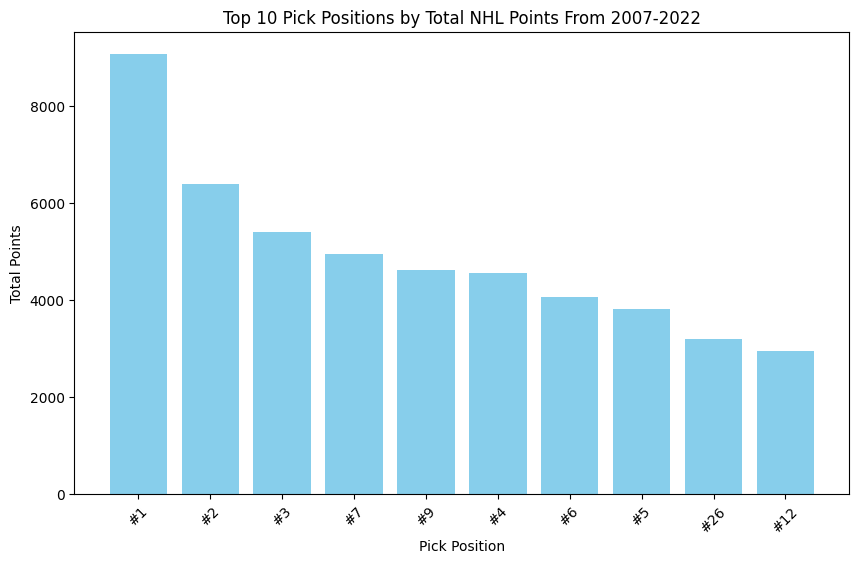

In [9]:
# Plot the top 10 picks using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_10_picks['Pick'], top_10_picks['Points'], color='skyblue')
plt.xlabel('Pick Position')
plt.ylabel('Total Points')
plt.title('Top 10 Pick Positions by Total NHL Points From 2007-2022')
plt.xticks(rotation=45)
plt.show()

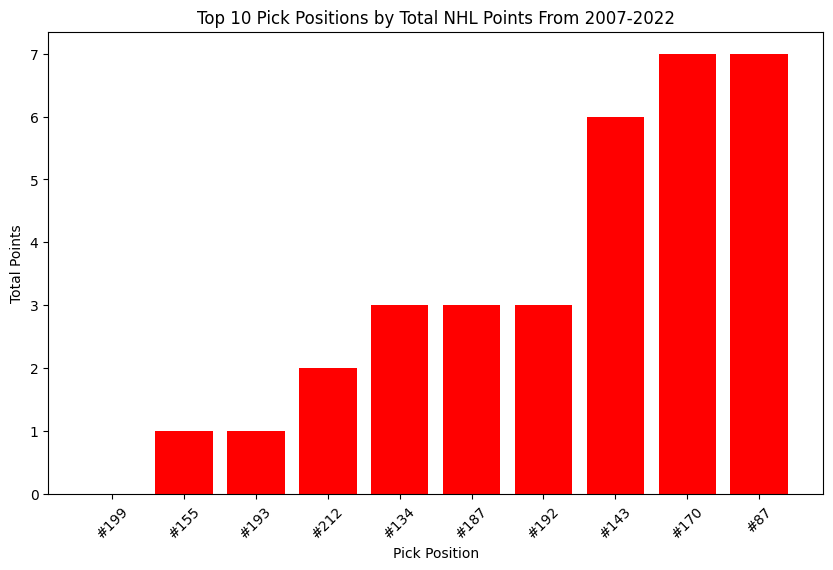

In [14]:
# Plot the top 10 picks using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(worst_10_pick['Pick'], worst_10_pick['Points'], color='red')
plt.xlabel('Pick Position')
plt.ylabel('Total Points')
plt.title('Top 10 Pick Positions by Total NHL Points From 2007-2022')
plt.xticks(rotation=45)
plt.show()